## Jupyter Notebook to obtain game data from the [RAWG Database API](https://api.rawg.io/docs/)


In [1]:
# setup & dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_url="https://api.rawg.io/api/"

Each API call returns a max of 20 results per page. The following cell loops through the calls until all game data between **1/1/2015 to 31/12/2019** are returned. 

Game data of interest consists of
* Game Name / ID
* Game Platform
* Game Store
* Game Genre
* Game Release Date
* Game Rating
* Game Metacritic Score
* Game User Status

In [2]:
# API call for all games released between 2015-2019

game_name=[]
game_id=[]
game_platform_num=[]
game_platform=[]
game_store_num=[]
game_store=[]
game_genre_num=[]
game_genre=[]
game_tag=[]
game_releasedate=[]
game_rating=[]
game_rating_top=[]
game_rating_count=[]
game_metacritic=[]
added_count=[]

count=1
while count:
    url=base_url+"games?dates=2015-01-01,2019-12-31&page="+str(count)
    response=requests.get(url)
    if response.status_code!=200:
        break
    else:
        games=response.json()
        print(f'getting data from {url}')
        for i in range(len(games["results"])):
            try:
                if (len(games["results"][i]["platforms"])>0) & \
                (len(games["results"][i]["stores"])>0) & \
                (len(games["results"][i]["genres"])>0) & \
                (games["results"][i]["rating"]>0) &\
                (games["results"][i]["metacritic"]>0):
                    # game name
                    game_name.append(games["results"][i]["name"])
                    #game id
                    game_id.append(games["results"][i]["id"])
                    # game platform
                    game_platform_num.append(len(games["results"][i]["parent_platforms"]))
                    game_platform_temp=[]
                    for j in range(len(games["results"][i]["parent_platforms"])):
                        game_platform_temp.append(games["results"][i]["parent_platforms"][j]["platform"]["name"])
                    game_platform.append(game_platform_temp)
                    # game store
                    game_store_num.append(len(games["results"][i]["stores"]))
                    game_store_temp=[]
                    for j in range(len(games["results"][i]["stores"])):
                        game_store_temp.append(games["results"][i]["stores"][j]["store"]["name"])
                    game_store.append(game_store_temp)
                    # game genre
                    game_genre_num.append(len(games["results"][i]["genres"]))
                    game_genre_temp=[]
                    for j in range(len(games["results"][i]["genres"])):
                        game_genre_temp.append(games["results"][i]["genres"][j]["name"])
                    game_genre.append(game_genre_temp)
                    # game tag
                    game_tag_temp=[]
                    for j in range(len(games["results"][i]["tags"])):
                        if (games["results"][i]["tags"][j]["language"]=="eng"):
                            game_tag_temp.append(games["results"][i]["tags"][j]["name"])
                    game_tag.append(game_tag_temp)
                    # game release date
                    game_releasedate.append(games["results"][i]["released"])
                    # game rating
                    game_rating.append(games["results"][i]["rating"])
                    game_rating_top.append(games["results"][i]["rating_top"])
                    game_rating_count.append(games["results"][i]["ratings_count"])
                    game_metacritic.append(games["results"][i]["metacritic"])
                    # added-by status
                    added_count.append(games["results"][i]["added_by_status"])
            except:
                continue
        count += 1
print("-----------------\nFinished obtaining game data\n-----------------")

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=1
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=2
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=3
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=4
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=5
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=6
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=7
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=8
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=9
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=10
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=11
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=12
g

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=99
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=100
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=101
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=102
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=103
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=104
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=105
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=106
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=107
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=108
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=109
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=196
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=197
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=198
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=199
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=200
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=201
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=202
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=203
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=204
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=205
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=206
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=293
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=294
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=295
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=296
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=297
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=298
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=299
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=300
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=301
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=302
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=303
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=390
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=391
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=392
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=393
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=394
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=395
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=396
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=397
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=398
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=399
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=400
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=487
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=488
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=489
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=490
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=491
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=492
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=493
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=494
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=495
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=496
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=497
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

In [3]:
# create a giant dataframe of all games released between 2015-2019
game_df = pd.DataFrame(
    {
        "name" : game_name,
        "id" : game_id,
        "number of platforms" : game_platform_num,
        "platforms" : game_platform,
        "number of stores" : game_store_num,
        "stores" : game_store,
        "number of genres" : game_genre_num,
        "genres" : game_genre,
        "tags" : game_tag,
        "release date" : game_releasedate,
        "rating" : game_rating,
        "max rating" : game_rating_top,
        "rating count" : game_rating_count,
        "metacritic score" : game_metacritic,
        "added" : added_count
          }
)

game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added
0,The Witcher 3: Wild Hunt,3328,4,"[PC, PlayStation, Xbox, Nintendo]",4,"[Steam, PlayStation Store, Xbox Store, GOG]",3,"[Adventure, Action, RPG]","[Full controller support, Action RPG, Atmosphe...",2015-05-18,4.67,5,3492,93,"{'yet': 560, 'owned': 6160, 'beaten': 2415, 't..."
1,Life is Strange,3439,7,"[PC, PlayStation, Xbox, iOS, Android, Apple Ma...",7,"[Steam, PlayStation Store, Xbox Store, App Sto...",1,[Adventure],"[Full controller support, Atmospheric, Choices...",2015-01-29,4.10,5,2232,83,"{'yet': 468, 'owned': 6167, 'beaten': 1925, 't..."
2,Red Dead Redemption 2,28,3,"[PC, PlayStation, Xbox]",4,"[Steam, PlayStation Store, Xbox Store, Epic Ga...",2,"[Adventure, Action]","[In-App Purchases, America, Partial Controller...",2018-10-26,4.56,5,2561,96,"{'yet': 405, 'owned': 4243, 'beaten': 1269, 't..."
3,DOOM (2016),2454,4,"[PC, PlayStation, Xbox, Nintendo]",4,"[Steam, PlayStation Store, Xbox Store, Nintend...",2,"[Shooter, Action]","[Partial Controller Support, Steam Achievement...",2016-05-13,4.40,5,2190,85,"{'yet': 317, 'owned': 4872, 'beaten': 1532, 't..."
4,Fallout 4,3070,3,"[PC, PlayStation, Xbox]",3,"[Steam, PlayStation Store, Xbox Store]",2,"[Action, RPG]","[Full controller support, Action RPG, Steam Ac...",2015-11-09,3.75,4,1991,84,"{'yet': 296, 'owned': 4850, 'beaten': 1240, 't..."


The next section deals with the ***game_df["added"]*** series.
The series reflects user groups, representing the proportion of users in each category:
1. yet
2. owned
3. beaten
4. to play
5. dropped
6. playing

In [4]:
# create and populate 'added' categories 
add_cat=["yet","owned","beaten","toplay","dropped","playing"]

for i in add_cat:
    for ind, item in game_df["added"].iteritems():
        try:
            game_df.loc[ind,i]=item[i]
        except:
            game_df.loc[ind,i]=0

for i in add_cat:
    game_df[i]=game_df[i].astype(int)
    
del game_df["added"]

# create a column called "users" that is the 
# total number of users under the categories'owned','playing', and 'beaten'
sum_col = ["owned", "playing", "beaten"]
game_df["users"] = game_df[sum_col].sum(axis=1)

# inspect resultant dataframe
game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users
0,The Witcher 3: Wild Hunt,3328,4,"[PC, PlayStation, Xbox, Nintendo]",4,"[Steam, PlayStation Store, Xbox Store, GOG]",3,"[Adventure, Action, RPG]","[Full controller support, Action RPG, Atmosphe...",2015-05-18,...,5,3492,93,560,6160,2415,456,428,594,9169
1,Life is Strange,3439,7,"[PC, PlayStation, Xbox, iOS, Android, Apple Ma...",7,"[Steam, PlayStation Store, Xbox Store, App Sto...",1,[Adventure],"[Full controller support, Atmospheric, Choices...",2015-01-29,...,5,2232,83,468,6167,1925,188,344,124,8216
2,Red Dead Redemption 2,28,3,"[PC, PlayStation, Xbox]",4,"[Steam, PlayStation Store, Xbox Store, Epic Ga...",2,"[Adventure, Action]","[In-App Purchases, America, Partial Controller...",2018-10-26,...,5,2561,96,405,4243,1269,1146,220,588,6100
3,DOOM (2016),2454,4,"[PC, PlayStation, Xbox, Nintendo]",4,"[Steam, PlayStation Store, Xbox Store, Nintend...",2,"[Shooter, Action]","[Partial Controller Support, Steam Achievement...",2016-05-13,...,5,2190,85,317,4872,1532,319,373,225,6629
4,Fallout 4,3070,3,"[PC, PlayStation, Xbox]",3,"[Steam, PlayStation Store, Xbox Store]",2,"[Action, RPG]","[Full controller support, Action RPG, Steam Ac...",2015-11-09,...,4,1991,84,296,4850,1240,226,732,223,6313


The next cell extracts the months and years out of the release date column

In [5]:
game_df["release date"]= pd.to_datetime(game_df["release date"])

game_df["month"] = pd.DatetimeIndex(game_df["release date"]).month
game_df["year"] = pd.DatetimeIndex(game_df["release date"]).year

In [6]:
# ensure there are no missing values
game_df.count()

name                   1211
id                     1211
number of platforms    1211
platforms              1211
number of stores       1211
stores                 1211
number of genres       1211
genres                 1211
tags                   1211
release date           1211
rating                 1211
max rating             1211
rating count           1211
metacritic score       1211
yet                    1211
owned                  1211
beaten                 1211
toplay                 1211
dropped                1211
playing                1211
users                  1211
month                  1211
year                   1211
dtype: int64

In [7]:
# export dataframe as a csv file
game_df.to_csv("csvfiles/game_final.csv",index=False)

### game developers
the next section uses the game ID recorded in the game_df DataFrame to run another series of API calls to obtain the games' developers

In [8]:
# getting game developer using game id
developers=[]

for i in game_df["id"]:
    url=base_url+"games/"+str(i)
    try:
        response=requests.get(url).json()
        print(f'getting developer from {url}')
        curr_dev=[]
        for j in range(len(response["developers"])):
            curr_dev.append(response["developers"][j]["name"])
        developers.append(curr_dev)
    except:
        developers.append("missing")

getting developer from https://api.rawg.io/api/games/3328
getting developer from https://api.rawg.io/api/games/3439
getting developer from https://api.rawg.io/api/games/28
getting developer from https://api.rawg.io/api/games/2454
getting developer from https://api.rawg.io/api/games/3070
getting developer from https://api.rawg.io/api/games/58175
getting developer from https://api.rawg.io/api/games/3272
getting developer from https://api.rawg.io/api/games/3192
getting developer from https://api.rawg.io/api/games/32
getting developer from https://api.rawg.io/api/games/278
getting developer from https://api.rawg.io/api/games/7689
getting developer from https://api.rawg.io/api/games/10035
getting developer from https://api.rawg.io/api/games/3287
getting developer from https://api.rawg.io/api/games/2462
getting developer from https://api.rawg.io/api/games/1447
getting developer from https://api.rawg.io/api/games/58134
getting developer from https://api.rawg.io/api/games/2551
getting develope

getting developer from https://api.rawg.io/api/games/715
getting developer from https://api.rawg.io/api/games/137
getting developer from https://api.rawg.io/api/games/382
getting developer from https://api.rawg.io/api/games/10040
getting developer from https://api.rawg.io/api/games/2574
getting developer from https://api.rawg.io/api/games/50778
getting developer from https://api.rawg.io/api/games/45821
getting developer from https://api.rawg.io/api/games/12884
getting developer from https://api.rawg.io/api/games/44525
getting developer from https://api.rawg.io/api/games/9979
getting developer from https://api.rawg.io/api/games/28026
getting developer from https://api.rawg.io/api/games/2845
getting developer from https://api.rawg.io/api/games/11228
getting developer from https://api.rawg.io/api/games/9741
getting developer from https://api.rawg.io/api/games/1225
getting developer from https://api.rawg.io/api/games/10296
getting developer from https://api.rawg.io/api/games/59313
getting 

getting developer from https://api.rawg.io/api/games/3307
getting developer from https://api.rawg.io/api/games/3238
getting developer from https://api.rawg.io/api/games/9845
getting developer from https://api.rawg.io/api/games/57896
getting developer from https://api.rawg.io/api/games/9644
getting developer from https://api.rawg.io/api/games/311
getting developer from https://api.rawg.io/api/games/13856
getting developer from https://api.rawg.io/api/games/47
getting developer from https://api.rawg.io/api/games/486
getting developer from https://api.rawg.io/api/games/22508
getting developer from https://api.rawg.io/api/games/10165
getting developer from https://api.rawg.io/api/games/22344
getting developer from https://api.rawg.io/api/games/3416
getting developer from https://api.rawg.io/api/games/58827
getting developer from https://api.rawg.io/api/games/3187
getting developer from https://api.rawg.io/api/games/87
getting developer from https://api.rawg.io/api/games/23702
getting devel

getting developer from https://api.rawg.io/api/games/495
getting developer from https://api.rawg.io/api/games/23323
getting developer from https://api.rawg.io/api/games/10364
getting developer from https://api.rawg.io/api/games/1657
getting developer from https://api.rawg.io/api/games/1433
getting developer from https://api.rawg.io/api/games/44931
getting developer from https://api.rawg.io/api/games/11839
getting developer from https://api.rawg.io/api/games/9603
getting developer from https://api.rawg.io/api/games/292842
getting developer from https://api.rawg.io/api/games/23458
getting developer from https://api.rawg.io/api/games/42912
getting developer from https://api.rawg.io/api/games/49563
getting developer from https://api.rawg.io/api/games/17417
getting developer from https://api.rawg.io/api/games/13156
getting developer from https://api.rawg.io/api/games/49428
getting developer from https://api.rawg.io/api/games/364806
getting developer from https://api.rawg.io/api/games/11514


getting developer from https://api.rawg.io/api/games/13468
getting developer from https://api.rawg.io/api/games/19626
getting developer from https://api.rawg.io/api/games/10753
getting developer from https://api.rawg.io/api/games/272448
getting developer from https://api.rawg.io/api/games/16867
getting developer from https://api.rawg.io/api/games/11728
getting developer from https://api.rawg.io/api/games/19649
getting developer from https://api.rawg.io/api/games/2196
getting developer from https://api.rawg.io/api/games/10004
getting developer from https://api.rawg.io/api/games/254542
getting developer from https://api.rawg.io/api/games/59602
getting developer from https://api.rawg.io/api/games/10081
getting developer from https://api.rawg.io/api/games/28203
getting developer from https://api.rawg.io/api/games/13008
getting developer from https://api.rawg.io/api/games/19272
getting developer from https://api.rawg.io/api/games/292843
getting developer from https://api.rawg.io/api/games/1

getting developer from https://api.rawg.io/api/games/10514
getting developer from https://api.rawg.io/api/games/45691
getting developer from https://api.rawg.io/api/games/104
getting developer from https://api.rawg.io/api/games/2037
getting developer from https://api.rawg.io/api/games/13271
getting developer from https://api.rawg.io/api/games/7441
getting developer from https://api.rawg.io/api/games/2777
getting developer from https://api.rawg.io/api/games/15392
getting developer from https://api.rawg.io/api/games/272421
getting developer from https://api.rawg.io/api/games/12629
getting developer from https://api.rawg.io/api/games/10387
getting developer from https://api.rawg.io/api/games/19562
getting developer from https://api.rawg.io/api/games/61051
getting developer from https://api.rawg.io/api/games/29324
getting developer from https://api.rawg.io/api/games/2366
getting developer from https://api.rawg.io/api/games/49790
getting developer from https://api.rawg.io/api/games/10094
ge

getting developer from https://api.rawg.io/api/games/1740
getting developer from https://api.rawg.io/api/games/1125
getting developer from https://api.rawg.io/api/games/2193
getting developer from https://api.rawg.io/api/games/2
getting developer from https://api.rawg.io/api/games/1287
getting developer from https://api.rawg.io/api/games/1328
getting developer from https://api.rawg.io/api/games/58913
getting developer from https://api.rawg.io/api/games/10513
getting developer from https://api.rawg.io/api/games/17282
getting developer from https://api.rawg.io/api/games/61152
getting developer from https://api.rawg.io/api/games/14615
getting developer from https://api.rawg.io/api/games/13908
getting developer from https://api.rawg.io/api/games/15542
getting developer from https://api.rawg.io/api/games/58766
getting developer from https://api.rawg.io/api/games/45
getting developer from https://api.rawg.io/api/games/3199
getting developer from https://api.rawg.io/api/games/15843
getting de

getting developer from https://api.rawg.io/api/games/15968
getting developer from https://api.rawg.io/api/games/249994
getting developer from https://api.rawg.io/api/games/257206
getting developer from https://api.rawg.io/api/games/60101
getting developer from https://api.rawg.io/api/games/10114
getting developer from https://api.rawg.io/api/games/282828
getting developer from https://api.rawg.io/api/games/14070
getting developer from https://api.rawg.io/api/games/10153
getting developer from https://api.rawg.io/api/games/46749
getting developer from https://api.rawg.io/api/games/11333
getting developer from https://api.rawg.io/api/games/15374
getting developer from https://api.rawg.io/api/games/2612
getting developer from https://api.rawg.io/api/games/2935
getting developer from https://api.rawg.io/api/games/23746
getting developer from https://api.rawg.io/api/games/10679
getting developer from https://api.rawg.io/api/games/9765
getting developer from https://api.rawg.io/api/games/444

getting developer from https://api.rawg.io/api/games/28007
getting developer from https://api.rawg.io/api/games/12511
getting developer from https://api.rawg.io/api/games/362941
getting developer from https://api.rawg.io/api/games/19558
getting developer from https://api.rawg.io/api/games/21974
getting developer from https://api.rawg.io/api/games/23373
getting developer from https://api.rawg.io/api/games/59601
getting developer from https://api.rawg.io/api/games/58825
getting developer from https://api.rawg.io/api/games/415
getting developer from https://api.rawg.io/api/games/71560
getting developer from https://api.rawg.io/api/games/6841
getting developer from https://api.rawg.io/api/games/59317
getting developer from https://api.rawg.io/api/games/15122
getting developer from https://api.rawg.io/api/games/9539
getting developer from https://api.rawg.io/api/games/375
getting developer from https://api.rawg.io/api/games/22168
getting developer from https://api.rawg.io/api/games/378625
g

(array([  6., 593., 426., 132.,   0.,  39.,  10.,   2.,   2.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

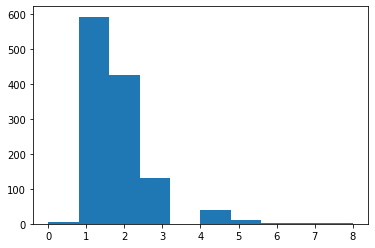

In [9]:
# exploring the number of developers per game
num_developers=[]

for i in developers:
    num_developers.append(len(i))
        
plt.hist(num_developers)

In [10]:
# creating a developer dataframe
developer_df=pd.DataFrame(
    {
        "game":game_df["name"],
        "developer":developers,
        "number of devs":num_developers,
        "rating":game_df["rating"],
        "rating count":game_df["rating count"],
        "metacritic":game_df["metacritic score"]
    }
)

# removing rows with missing/no developers in the developer dataframe
developer_df=developer_df[developer_df["developer"]!="missing"]
developer_df=developer_df[developer_df["developer"].map(len) > 0]

# getting the first developer from the list, as most games only have one developer
for i in developer_df.index:
    developer_df.loc[i,"first dev"]=str(developer_df.loc[i,"developer"][0])

In [11]:
# save the developer dataframe to a csv file
developer_df.to_csv("csvfiles/developers.csv",index=False)
developer_df.head()

,game,developer,number of devs,rating,rating count,metacritic,first dev
0,The Witcher 3: Wild Hunt,[CD PROJEKT RED],1,4.67,3492,93,CD PROJEKT RED
1,Life is Strange,[DONTNOD Entertainment],1,4.10,2232,83,DONTNOD Entertainment
2,Red Dead Redemption 2,[Rockstar Games],1,4.56,2561,96,Rockstar Games
3,DOOM (2016),"[Bethesda Softworks, id Software]",2,4.40,2190,85,Bethesda Softworks
4,Fallout 4,[Bethesda Game Studios],1,3.75,1991,84,Bethesda Game Studios


### platforms summary
The next section explores the gaming platforms and creates a summary dataframe of platforms

In [12]:
# make a dataframe of all parent platforms
platform_name=[]

platforms=requests.get(base_url+"platforms/lists/parents").json()
for i in range(len(platforms["results"])):
    platform_name.append(platforms["results"][i]["name"])
    
platform_df=pd.DataFrame({"name" : platform_name})

# get game rating by platform
platform_df["rating"]=0
platform_df["rating count"]=0
platform_df["number of games"]=0

for i in game_df.index:
    rating=game_df.loc[i,"rating"]*game_df.loc[i,"rating count"]
    rating_count=game_df.loc[i,"rating count"]
    platform=game_df.loc[i,"platforms"]
    for j in platform:
        for k in platform_df.index:
            if platform_df.loc[k,"name"]==j:
                platform_df.loc[k,"rating"]=platform_df.loc[k,"rating"]+float(rating)
                platform_df.loc[k,"rating count"]=platform_df.loc[k,"rating count"]+int(rating_count)
                platform_df.loc[k,"number of games"]=platform_df.loc[k,"number of games"]+1

platform_df["avg rating"]=platform_df["rating"]/platform_df["rating count"]
del platform_df["rating"]

# export dataframe to a csv file
platform_df.to_csv("csvfiles/game_platform.csv",index=False)

platform_df

,name,rating count,number of games,avg rating
0,PC,202901,1117,3.865626
1,PlayStation,192877,787,3.920889
2,Xbox,165833,648,3.883863
3,iOS,31743,206,3.828378
4,Android,21078,126,3.816831
5,Apple Macintosh,72977,495,3.832126
6,Linux,54755,338,3.867277
7,Nintendo,83258,436,3.997641
8,Atari,0,0,NaN
9,Commodore / Amiga,0,0,NaN


### platforms summary

The next section explores the gaming stores and creates a summary dataframe of stores

In [13]:
# make a dataframe of all game store
store_name=[]

stores=requests.get(base_url+"stores").json()
for i in range(len(stores["results"])):
    store_name.append(stores["results"][i]["name"])
    
store_df=pd.DataFrame({"name" : store_name})

# get game rating by game store
store_df["rating"]=0
store_df["rating count"]=0
store_df["number of games"]=0

for i in game_df.index:
    rating=game_df.loc[i,"rating"]*game_df.loc[i,"rating count"]
    rating_count=game_df.loc[i,"rating count"]
    store=game_df.loc[i,"stores"]
    for j in store:
        for k in store_df.index:
            if store_df.loc[k,"name"]==j:
                store_df.loc[k,"rating"]=store_df.loc[k,"rating"]+float(rating)
                store_df.loc[k,"rating count"]=store_df.loc[k,"rating count"]+int(rating_count)
                store_df.loc[k,"number of games"]=store_df.loc[k,"number of games"]+1

store_df["avg rating"]=store_df["rating"]/store_df["rating count"]
del store_df["rating"]

# export dataframe to a csv file
store_df.to_csv("csvfiles/game_store.csv",index=False)

store_df

,name,rating count,number of games,avg rating
0,Steam,193083,1079,3.869137
1,PlayStation Store,180124,736,3.918957
2,Xbox Store,161287,637,3.880115
3,App Store,37802,212,3.818056
4,GOG,78132,446,3.935542
5,Nintendo Store,72480,395,3.976048
6,Xbox 360 Store,11796,29,3.761810
7,Google Play,20757,118,3.805994
8,itch.io,5380,41,4.037468
9,Epic Games,41841,107,3.984580
